In [4]:
import os
import glob
import pandas as pd
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
def create_image_data_csv(root_dir, csv_file_path):
    data = []

    # Pattern to match all image files
    pattern = os.path.join(root_dir, '*', '*', '*.*')  
    
    for img_path in glob.glob(pattern):
        # Extract art movement and artist from the path
        parts = img_path.split(os.sep)
        art_movement, artist = parts[-3], parts[-2]
        data.append([img_path, art_movement, artist])

    # Create a DataFrame and save to CSV
    df = pd.DataFrame(data, columns=['Image_Path', 'Art_Movement', 'Artist'])
    df.to_csv(csv_file_path, index=False)

create_image_data_csv('../data/WikiArt', '../data/wikiart_image_data.csv')


In [6]:
df_art = pd.read_csv('../data/wikiart_image_data.csv')

In [7]:
df_art.head()

,Image_Path,Art_Movement,Artist
0,../data/WikiArt/expressionism/paul-klee/the-go...,expressionism,paul-klee
1,../data/WikiArt/expressionism/paul-klee/error-...,expressionism,paul-klee
2,../data/WikiArt/expressionism/paul-klee/fruits...,expressionism,paul-klee
3,../data/WikiArt/expressionism/paul-klee/puppet...,expressionism,paul-klee
4,../data/WikiArt/expressionism/paul-klee/growth...,expressionism,paul-klee


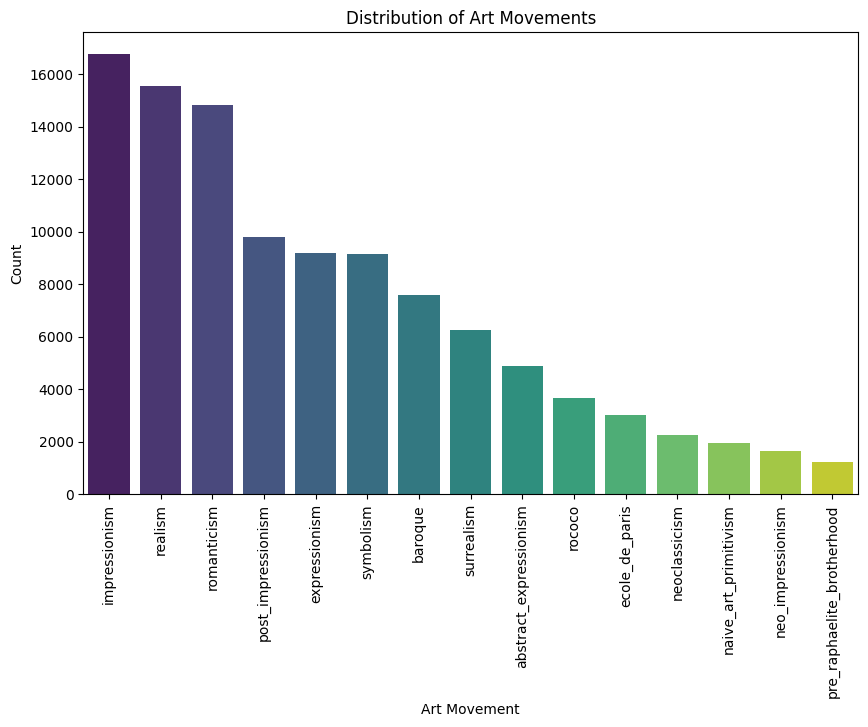

In [11]:
# Distribution of Art Movements 
art_movement_counts = df_art['Art_Movement'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=art_movement_counts.index, y=art_movement_counts.values, palette="viridis")
plt.xlabel('Art Movement')
plt.ylabel('Count')
plt.title('Distribution of Art Movements')
plt.xticks(rotation=90)
plt.show()

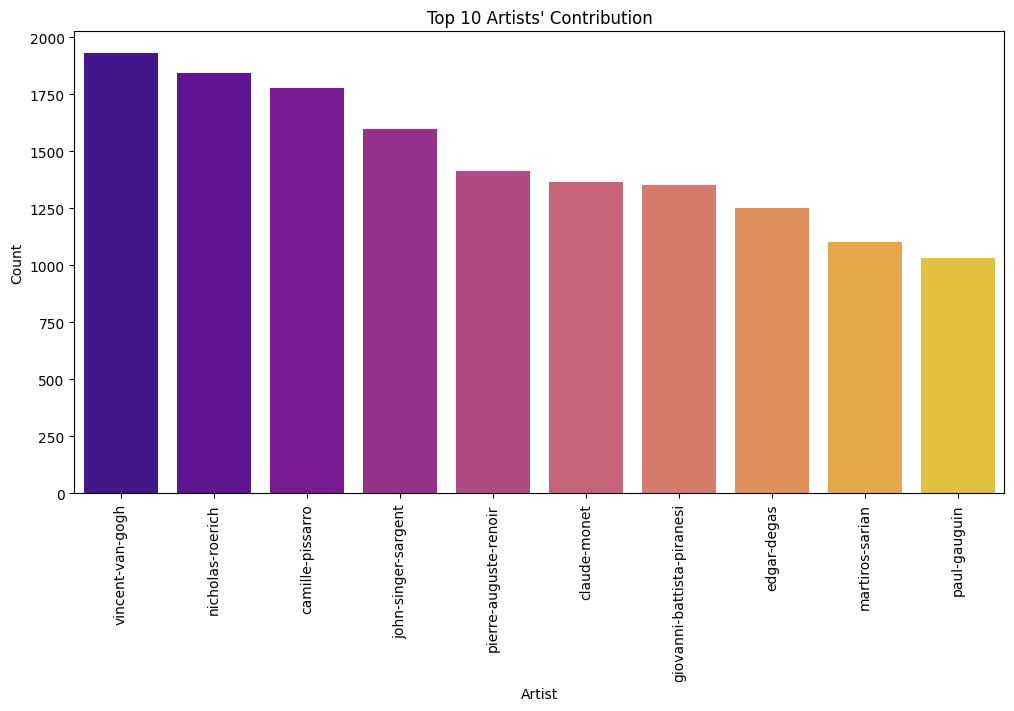

In [26]:
artist_counts = df_art['Artist'].value_counts()
# Specify the number of top artists to display
top_n = 10  

# Get the top N contributing artists
top_artists = artist_counts.head(top_n)

# Create a bar chart for the top artists
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette="plasma")
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title(f"Top {top_n} Artists' Contribution")
plt.xticks(rotation=90)
plt.show()


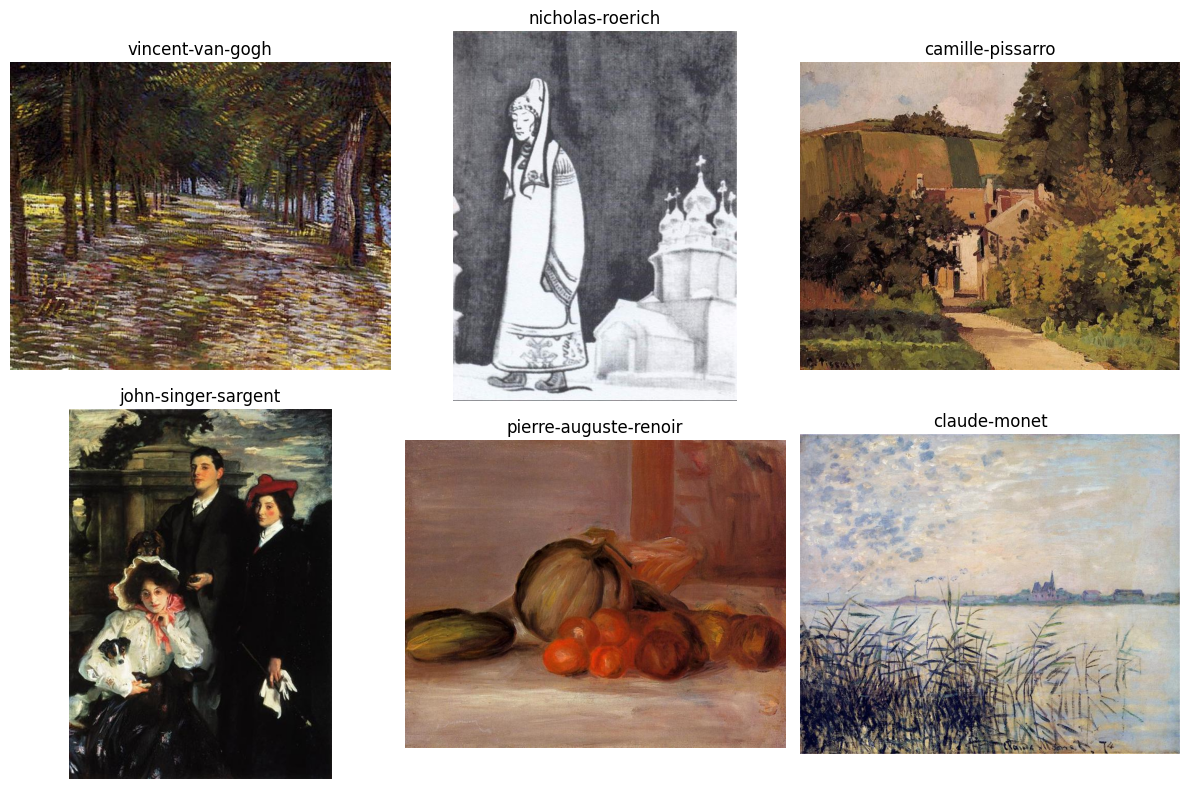

In [29]:
# Select the top 5-6 contributing artists based on your criteria
top_n_artists = artist_counts.head(6)  # Change the number as needed

# Create a sub-dataframe containing only artworks by the top artists
top_artists_df = df_art[df_art['Artist'].isin(top_n_artists.index)]

# Define the number of rows and columns for the grid
num_rows = 2  # Adjust as needed
num_cols = 3  # Adjust as needed

# Create a grid of subplots for displaying images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Loop through the top artists and display their images in the grid
for i, artist in enumerate(top_n_artists.index):
    row = i // num_cols
    col = i % num_cols

    # Get a sample artwork path for the artist (assuming Image_Path column contains file paths)
    sample_image_path = top_artists_df[top_artists_df['Artist'] == artist]['Image_Path'].sample(1).values[0]

    # Load and display the image using PIL
    image = Image.open(sample_image_path)
    axes[row, col].imshow(np.array(image))
    axes[row, col].set_title(artist)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


In [33]:
# Group by 'Art_Movement' and 'Artist' and calculate the count of artworks for each combination
art_movement_artist_counts = df_art.groupby(['Art_Movement', 'Artist']).size().reset_index(name='Count')

# Get the top artist for each art movement
top_artist_by_movement = art_movement_artist_counts.groupby('Art_Movement')[['Artist', 'Count']].max().reset_index()

# Optionally, you can sort the DataFrame to show the top artist with the highest count first
top_artist_by_movement = top_artist_by_movement.sort_values(by='Count', ascending=False)

print(top_artist_by_movement)
# Create a bar chart using Plotly Express
fig = px.bar(
    top_artist_by_movement,
    x='Art_Movement',
    y='Count',
    color='Artist',
    title='Artworks Count by Art Movement and Artist',
    labels={'Count': 'Count of Artworks'},
    text='Count',
)

# Customize the layout
fig.update_xaxes(tickangle=-45)  

# Show the interactive plot
fig.show()

In [47]:

# Group by 'Artist' and 'Art_Movement' and calculate the count of artworks for each combination
artist_movement_counts = df_art.groupby(['Artist', 'Art_Movement']).size().reset_index(name='Count')

# Find the top 10 artists by the count of artworks
top_10_artists = artist_movement_counts.groupby('Artist')['Count'].sum().nlargest(10).index.tolist()

# Filter the data to include only the top 10 artists
top_10_data = artist_movement_counts[artist_movement_counts['Artist'].isin(top_10_artists)]


# Create a TreeMap using Plotly Express
fig = px.treemap(
    top_10_data,
    path=['Artist', 'Art_Movement'],
    values='Count',
    title='Artist- Art Movement TreeMap',
)

# Customize the layout
fig.update_layout(
    margin=dict(l=10, r=10, t=60, b=10),  
)

# Show the interactive TreeMap
fig.show()

In [12]:
with Image.open("../data/WikiArt/expressionism/georg-tappert/nyassa-1929.jpg") as img:
    # Resize image
    img = img.resize((128, 128))

In [13]:
img_array = np.asarray(img)

In [14]:
img_array.shape

(128, 128, 3)

In [15]:
img_array = img_array / 255.0

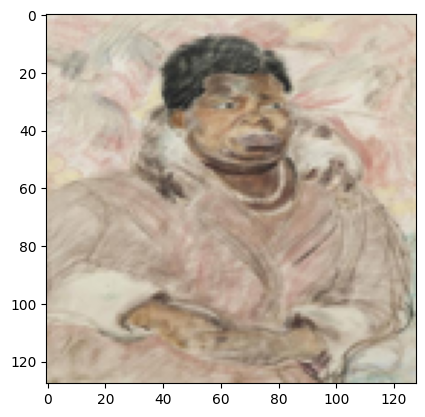

In [16]:
import matplotlib.pyplot as plt

plt.imshow(img_array)

In [17]:
img = Image.fromarray((img_array * 255).astype(np.uint8))

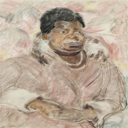

In [18]:
img.convert('RGB')

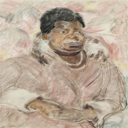

In [19]:
img